In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## EDA

In [2]:
df = pd.read_csv("data/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [33]:
# checking missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

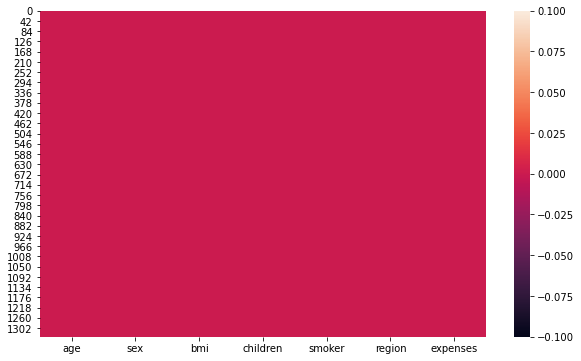

In [25]:
# checking missing values using heatmap
plt.subplots(figsize=(10,6))
sns.heatmap(df.isna());

In [26]:
cat_data = [feat for feat in df.columns if df[feat].dtype == "O"]

In [27]:
cat_data

['sex', 'smoker', 'region']

In [30]:
num_data = [feat for feat in df.columns if feat not in cat_data]

In [31]:
num_data

['age', 'bmi', 'children', 'expenses']

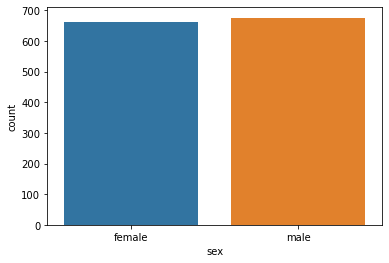

In [40]:
sns.countplot(df["sex"])

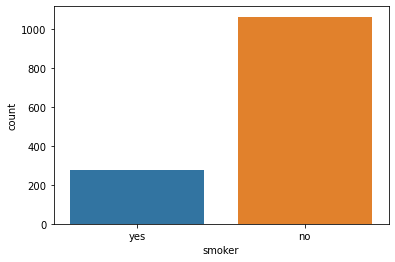

In [41]:
sns.countplot(df["smoker"])

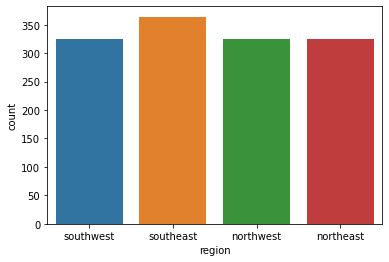

In [42]:
sns.countplot(df["region"])

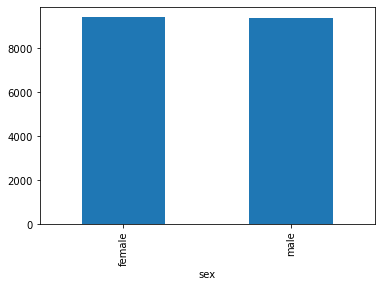

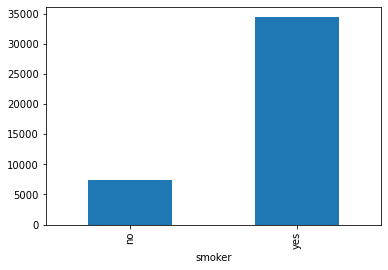

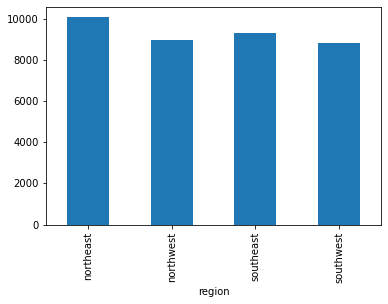

In [58]:
for feat in cat_data:
    df.groupby(feat)["expenses"].median().plot(kind="bar")
    plt.show(

In [61]:
num_data

['age', 'bmi', 'children', 'expenses']

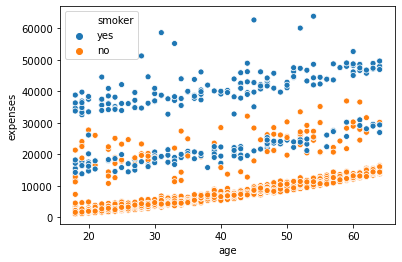

In [64]:
sns.scatterplot(df["age"],df["expenses"],hue=df["smoker"]);

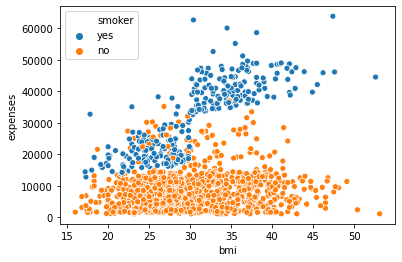

In [68]:
sns.scatterplot(df["bmi"],df["expenses"], df["smoker"])

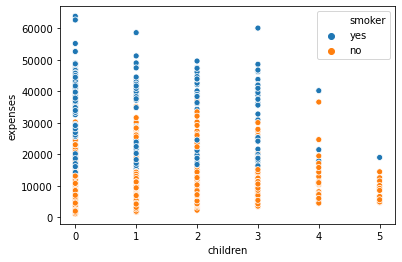

In [80]:
sns.scatterplot(df["children"], df["expenses"],df["smoker"])

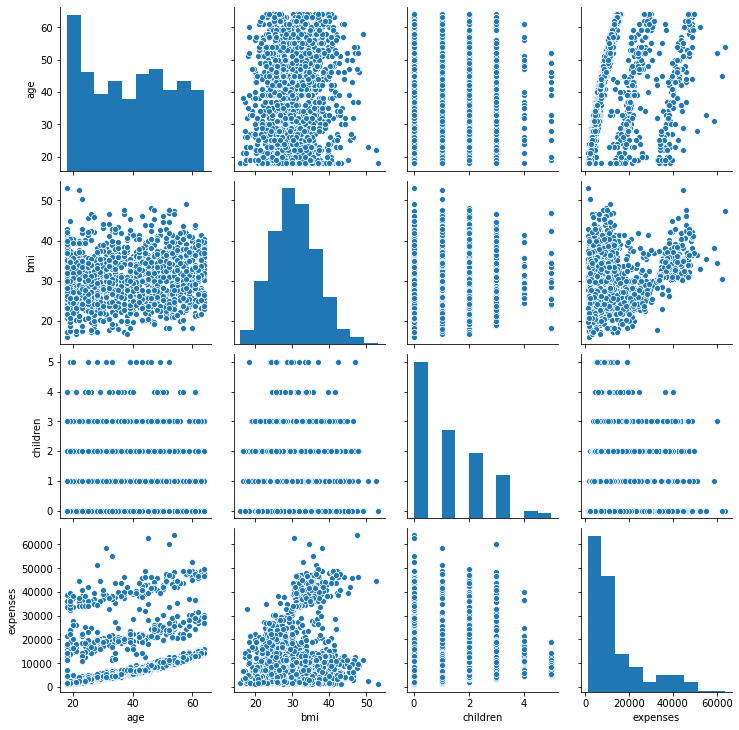

In [91]:
sns.pairplot(df)

interval columns not set, guessing: ['age', 'bmi', 'children', 'expenses']


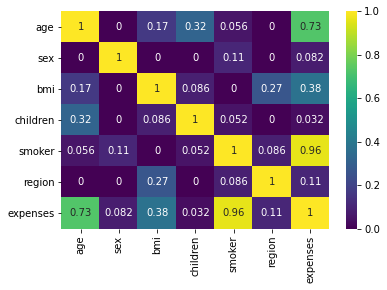

In [92]:
sns.heatmap(df.phik_matrix(), annot=True, cmap="viridis")

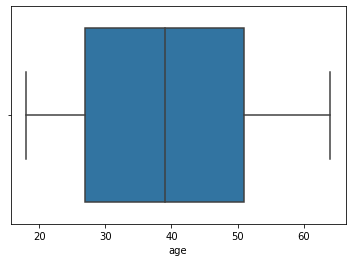

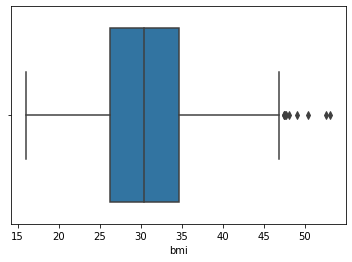

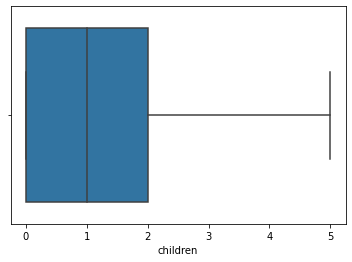

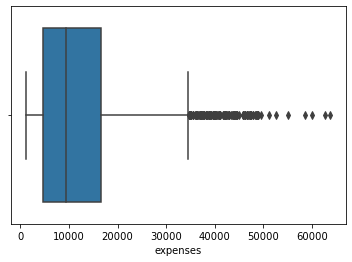

In [114]:
for feat in num_data:
    sns.boxplot(df[feat])
    plt.show();

### Observations

1. There is no missing values.
2. There are three categorical features which we'll handle in feature engineering.
3. Smoker and age is very correlated to the output feature.
4. There are some outliers in BMI.

## Feature Engineering

In [103]:
cat_data

['sex', 'smoker', 'region']

In [3]:
df["sex"] = df["sex"].map({"female":0, "male":1})

In [4]:
df["smoker"] = df["smoker"].map({"yes":1,"no":0})

In [5]:
df["region"] = df["region"].map({"southeast":0, "southwest":1, "northwest":2, "northeast":3})

In [112]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,-0.012816,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,-0.262750,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262750,0.001205,-0.038873,1.000000,-0.039473
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.039473,1.000000


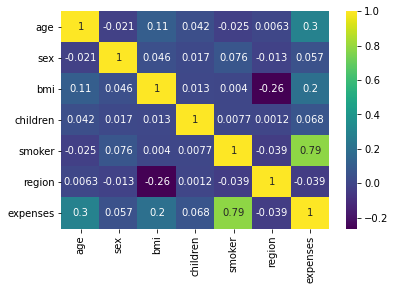

In [115]:
sns.heatmap(df.corr(), annot=True, cmap="viridis")

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [7]:
X = df.drop("expenses",axis=1)
y = df["expenses"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.7839067775185787

In [10]:
model_knn = KNeighborsRegressor()

model_knn.fit(X_train,y_train)
model_knn.score(X_test, y_test)

0.1531918078099218

In [11]:
model_rand = RandomForestRegressor()

model_rand.fit(X_train, y_train)
model_rand.score(X_test, y_test)

0.8669316073993908

In [12]:
model_ada = AdaBoostRegressor()

model_ada.fit(X_train, y_train)
model_ada.score(X_test, y_test)

0.8212092350031162

In [13]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error

In [14]:
y_preds = model_rand.predict(X_test)

In [15]:
print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))

0.8669316073993908
2457.270474738806
20658699.450333513


In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = {"n_estimators":[100,200,300],
          "criterion":["mse","mae"],
          "max_depth":[None,1,2,5],
          "min_samples_split":[2,4]}

In [18]:
model = RandomForestRegressor()

In [21]:
model_grid = GridSearchCV(estimator=model, param_grid=params,scoring="r2",
                         n_jobs=-1)

In [22]:
model_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [None, 1, 2, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [23]:
model_grid.best_params_

{'criterion': 'mae',
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [24]:
model_grid.score(X_test, y_test)

0.8718661885872687

In [25]:
y_preds = model_grid.predict(X_test)

In [26]:
print(r2_score(y_test,y_preds))
print(mean_absolute_error(y_test,y_preds))
print(mean_squared_error(y_test,y_preds))

0.8718661885872687
1781.938895708955
19892611.969442327


In [27]:
import pickle
pickle.dump(model_grid,open("insurance.pkl","wb"))